# **Load Dataset**

loads the CSV file of dataset into a DataFrame, and prints the first few rows of the data to provide a quick overview

In [2]:
import pandas as pd

# Load the downloaded CSV file
data = pd.read_csv('final_Audio_dataset .csv')
print("Loaded Data:")
data.head()

Loaded Data:


,filename,label,student_id,Mfcc_1,Mfcc_2,Mfcc_3,Mfcc_4,Mfcc_5,Mfcc_6,Mfcc_7,...,Spectral_Contrast_2,Spectral_Contrast_3,Spectral_Contrast_4,Spectral_Contrast_5,Spectral_Contrast_6,Spectral_Contrast_7,Zero_Crossing_Rate,RMS_Energy,Spectral_Centroid,Spectral_Bandwidth
0,HW1_Q5_810801072_Male.mp3_0,male,810801072,-155.217852,135.871079,-13.262353,47.794728,7.207893,7.300228,-22.951777,...,15.134972,17.070269,14.433772,17.228962,18.581393,58.160648,0.047679,[0.23225176],1229.271846,1533.279825
1,HW1_Q5_810801072_Male.mp3_1,male,810801072,-177.114558,140.304623,-21.115352,46.488005,-3.399340,16.619354,-25.741743,...,14.806266,16.118720,14.425761,16.752967,18.602274,60.356715,0.059593,[0.14712484],1343.079574,1608.519421
2,HW1_Q5_810801072_Male.mp3_2,male,810801072,-162.584909,120.209218,-14.282396,57.224400,-7.945799,16.344686,-23.463047,...,15.976979,15.895401,14.369768,16.341339,18.345921,63.918985,0.086666,[0.17661643],1617.971710,1646.950283
3,HW1_Q5_810801072_Male.mp3_3,male,810801072,-165.845303,145.862184,-10.069458,37.615732,-4.063423,11.771095,-19.396108,...,17.257902,16.087427,14.417355,16.030734,18.538016,60.833595,0.049463,[0.21423991],1202.299332,1526.762868
4,HW1_Q5_810801072_Male.mp3_4,male,810801072,-178.106893,132.620852,-11.592609,59.768651,1.988449,9.041938,-14.379663,...,16.781561,17.587037,13.861953,15.965217,18.759575,59.502767,0.043889,[0.20913659],1188.361837,1551.776937


# **Preparing a Balanced Dataset for Voice Samples**:
we ensure that our dataset is balanced with an equal number of voice samples per student. This balanced dataset is essential for conducting unbiased and accurate clustering analysis on the voice samples.

## Extract Unique Student IDs
To start, we need to identify all unique student IDs from our dataset. This helps us determine the total number of students whose voice samples are included.

In [3]:
import numpy as np


# Get unique student IDs
student_ids = np.array(data['student_id'].unique())

print(f"Number of Students in dataset: {len(student_ids)}")

Number of Students in dataset: 56


## Ensure Equal Number of Samples per Student

Next, we balance the dataset to ensure that each student contributes an equal number of voice samples. This step is crucial because it avoids any bias that might arise from having more samples for some students than others. We achieve this by grouping the data by student IDs and then randomly sampling an equal number of voice samples for each student.
The final dataset is shuffled to avoid any ordering biases.

In [4]:
# Ensure each student has an equal number of samples
from sklearn.utils import shuffle

balanced_data = data.groupby('student_id').apply(lambda x: x.sample(n=data['student_id'].value_counts().min(), random_state=42)).reset_index(drop=True)
balanced_data = shuffle(balanced_data, random_state=42)
balanced_data.reset_index(drop=True, inplace=True)

print("Number of samples for each student in the balanced DataFrame:")
print(balanced_data['student_id'].value_counts())

Number of samples for each student in the balanced DataFrame:
student_id
810102286    74
810102066    74
810101560    74
810100075    74
610300070    74
810103092    74
810102017    74
810102029    74
810600065    74
810100590    74
810100198    74
610300017    74
810103019    74
810102327    74
810103197    74
810801072    74
810103146    74
810100091    74
810102087    74
810101413    74
810102147    74
810199428    74
810103162    74
810100135    74
810103338    74
810102027    74
810101551    74
810103093    74
810101419    74
810199570    74
810100217    74
810600088    74
810800024    74
810198554    74
810103172    74
810100268    74
810199417    74
810103112    74
151501033    74
810101401    74
810199459    74
810100107    74
810101471    74
810102032    74
810100168    74
810102148    74
810600097    74
810199489    74
810101456    74
810103317    74
810100222    74
810600133    74
610399182    74
810100193    74
810102142    74
810103123    74
Name: count, dtype: int64


/tmp/ipykernel_34791/2328745276.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  balanced_data = data.groupby('student_id').apply(lambda x: x.sample(n=data['student_id'].value_counts().min(), random_state=42)).reset_index(drop=True)


In [5]:
balanced_data.head()

,filename,label,student_id,Mfcc_1,Mfcc_2,Mfcc_3,Mfcc_4,Mfcc_5,Mfcc_6,Mfcc_7,...,Spectral_Contrast_2,Spectral_Contrast_3,Spectral_Contrast_4,Spectral_Contrast_5,Spectral_Contrast_6,Spectral_Contrast_7,Zero_Crossing_Rate,RMS_Energy,Spectral_Centroid,Spectral_Bandwidth
0,HW1_Q3_810102286_male.mp3_4,male,810102286,-197.912472,107.633654,-11.539810,56.125896,-15.236170,15.284010,-26.977008,...,14.005053,17.353889,14.649133,17.807422,17.608122,61.463602,0.082347,[0.1710245],1685.017316,1700.610195
1,HW1_Q6_810102066_male.mp3_17,male,810102066,-183.315875,134.835013,-16.909837,59.870350,10.951573,-0.120129,-9.603931,...,16.640179,19.627198,16.000302,17.007087,21.692815,61.607452,0.043138,[0.21796311],1154.980421,1449.490178
2,HW1_Q1_810101560_male.mp3_35,male,810101560,-194.596965,134.064796,-25.204977,17.841582,-1.965283,2.422037,-22.388951,...,19.666797,22.288280,20.126503,21.626637,21.976848,61.148825,0.052754,[0.26550305],1110.339741,1288.619953
3,HW1_Q2_810100075_female.mp3_16,female,810100075,-238.963271,107.780431,-8.856019,43.999588,-31.931468,-15.099112,-48.757971,...,20.960877,19.969843,19.431357,20.355983,20.725971,62.030099,0.120188,[0.16735134],1837.314096,1475.759894
4,HW1_Q1_610300070_female.mp3_39,female,610300070,-211.923648,98.073569,-14.975225,37.718638,-26.440407,5.163010,-41.542968,...,19.805699,19.900532,17.490986,19.096119,18.742791,62.720936,0.091232,[0.14230755],1806.906191,1755.255110


In [6]:
print('Number of male samples:')
print(balanced_data['label'].value_counts().get('male', 0))
print('Number of female samples:')
print(balanced_data['label'].value_counts().get('female', 0))

Number of male samples:
2072
Number of female samples:
2072


# **Clustering**
In our clustering analysis, we considered two key types of features from the voice samples:

*   Mel-Frequency Cepstral Coefficients (MFCC)
*   Spectral Contrast

**Clustering Approaches**:

*   To explore the best approach for clustering the voice samples, we applied two clustering models (**K-Means++** and **Gaussian Mixture Model**) under different conditions:
  *   Without Feature Reduction
      *   Mfcc and Spectral Contrast
  *   With Principal Component Analysis (PCA)
      *   Mfcc and Spectral Contrast
      *   Mfcc
      *   Spectral Contrast

For each of the three scenarios above, we used the calculate_silhouette_scores function to evaluate the clustering performance across a range of cluster numbers. By calculating the silhouette scores, we aimed to identify the optimal number of clusters that best represent the data structure under different feature reduction techniques.






## Column of Features in dataframe

In [7]:
mfcc_features = [f'Mfcc_{i+1}' for i in range(13)]
spectral_contrast_features = [f'Spectral_Contrast_{i+1}' for i in range(7)]
combined_features = mfcc_features + spectral_contrast_features
time_features = ['Zero_Crossing_Rate',	'RMS_Energy']
Spec_cent_Bw = ['Spectral_Centroid',	'Spectral_Bandwidth']
all_features = combined_features + time_features + Spec_cent_Bw
balanced_data['RMS_Energy'] = balanced_data['RMS_Energy'].astype(str).str.replace('[', '', regex=False).str.replace(']', '', regex=False).astype(float)

## Function for Calculating Clustering Performance with Silhouette Scores

---


The function calculate_silhouette_scores is designed to calculate the silhouette scores for different numbers of clusters (or components) using either the K-Means or Gaussian Mixture Model (GMM) clustering methods. This helps in evaluating the quality of the clustering by measuring how well-separated the clusters are.

The function returns the array of silhouette scores corresponding to the different numbers of clusters.

This function allows us to systematically evaluate how the quality of clustering changes with different numbers of clusters, helping to identify the optimal number of clusters for the given dataset.

In [8]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score

# Function to calculate Silhouette Scores
def calculate_silhouette_scores(model_type, X, n_clusters_range):

    scores = np.zeros(len(n_clusters_range))

    for i, n_clusters in enumerate(n_clusters_range):
        if model_type == 'kmeans':
            model = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
        elif model_type == 'gmm':
            model = GaussianMixture(n_components=n_clusters, random_state=42)
        else:
            raise ValueError("Unsupported model type. Use 'kmeans' or 'gmm'.")

        model.fit(X)

        if model_type == 'kmeans':
            labels = model.labels_
        elif model_type == 'gmm':
            labels = model.predict(X)

        scores[i] = silhouette_score(X, labels)

    return scores

## Clustering without feature reduction using MFCC and Spectral Contrast features
We applied the clustering models directly on the extracted features (MFCC and spectral contrast) without any dimensionality reduction. This approach helps us understand how the models perform with the raw high-dimensional feature space.

### Combination of MFCC and Spectral Contrast features

In [9]:
scaler = StandardScaler()
X = scaler.fit_transform(balanced_data[combined_features])

In [10]:
n_clusters_range = range(2, 100)

# Calculate Silhouette Scores for KMeans and GMM
kmeans_scores = calculate_silhouette_scores('kmeans', X, n_clusters_range)
gmm_scores = calculate_silhouette_scores('gmm', X, n_clusters_range)

In [11]:
# Store scores in a dictionary for plotting
scores_dict = {
    'kmeans': np.array(kmeans_scores),
    'gmm': np.array(gmm_scores)
}

In [12]:
# Find the optimum number of clusters for KMeans and GMM
optimal_clusters = {}

# For KMeans
optimal_clusters['kmeans'] = np.argmax(scores_dict['kmeans']) + 2

# For GMM
optimal_clusters['gmm'] = np.argmax(scores_dict['gmm']) + 2


In [13]:
print(optimal_clusters)

{'kmeans': np.int64(55), 'gmm': np.int64(54)}


## Use feature reduction

We reduced the dimensionality of the feature space using PCA, retaining 3 principal components. This step helps in reducing the computational complexity and noise, potentially improving clustering performance.

### PCA and combination of MFCC and Spectral contrast


In [14]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X = scaler.fit_transform(balanced_data[combined_features])

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)

In [15]:
n_clusters_range = range(2, 100)

# Calculate Silhouette Scores for KMeans and GMM
kmeans_scores_PCA = calculate_silhouette_scores('kmeans', X_pca, n_clusters_range)
gmm_scores_PCA = calculate_silhouette_scores('gmm', X_pca, n_clusters_range)


In [16]:
# Store scores in a dictionary for plotting
scores_dict['kmeans_PCA'] =  np.array(kmeans_scores_PCA)
scores_dict['gmm_PCA'] = np.array(gmm_scores_PCA)

In [17]:
# For KMeans
optimal_clusters['kmeans_PCA'] = np.argmax(scores_dict['kmeans_PCA']) + 2

# For GMM
optimal_clusters['gmm_PCA'] = np.argmax(scores_dict['gmm_PCA']) + 2

### PCA and MFCC features


In [18]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X = scaler.fit_transform(balanced_data[mfcc_features])

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)

In [19]:
n_clusters_range = range(2, 100)

# Calculate Silhouette Scores for KMeans and GMM
kmeans_scores_Mfcc_PCA = calculate_silhouette_scores('kmeans', X_pca, n_clusters_range)
gmm_scores_Mfcc_PCA = calculate_silhouette_scores('gmm', X_pca, n_clusters_range)


In [20]:
# Store scores in a dictionary for plotting
scores_dict['kmeans_PCA_Mfcc']= np.array(kmeans_scores_Mfcc_PCA)
scores_dict['gmm_PCA_Mfcc']= np.array(gmm_scores_Mfcc_PCA)

In [21]:
# For KMeans
optimal_clusters['kmeans_PCA_Mfcc'] = np.argmax(scores_dict['kmeans_PCA_Mfcc']) + 2

# For GMM
optimal_clusters['gmm_PCA_Mfcc'] = np.argmax(scores_dict['gmm_PCA_Mfcc']) + 2

### PCA and spectral contrast features

In [22]:
from sklearn.decomposition import PCA
scaler = StandardScaler()
X = scaler.fit_transform(balanced_data[spectral_contrast_features])

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)

In [23]:
n_clusters_range = range(2, 100)

# Calculate Silhouette Scores for KMeans and GMM
kmeans_scores_SpContrast_PCA = calculate_silhouette_scores('kmeans', X_pca, n_clusters_range)
gmm_scores_SpContrast_PCA = calculate_silhouette_scores('gmm', X_pca, n_clusters_range)

In [24]:
# Store scores in a dictionary for plotting
scores_dict['kmeans_PCA_SpCnt']= np.array(kmeans_scores_SpContrast_PCA)
scores_dict['gmm_PCA_SPCnt']= np.array(gmm_scores_SpContrast_PCA)

In [25]:
# For KMeans
optimal_clusters['kmeans_PCA_SpCnt'] = np.argmax(scores_dict['kmeans_PCA_SpCnt']) + 2

# For GMM
optimal_clusters['gmm_PCA_SPCnt'] = np.argmax(scores_dict['gmm_PCA_SPCnt']) + 2

## PLOT
For each of the scenarios above, we used the calculate_silhouette_scores function to evaluate the clustering performance across a range of cluster numbers. By calculating the silhouette scores, we aimed to identify the optimal number of clusters that best represent the data structure under different feature reduction techniques.


In [26]:
print("Optimum number of clusters:")
print(optimal_clusters)

Optimum number of clusters:
{'kmeans': np.int64(55), 'gmm': np.int64(54), 'kmeans_PCA': np.int64(2), 'gmm_PCA': np.int64(2), 'kmeans_PCA_Mfcc': np.int64(2), 'gmm_PCA_Mfcc': np.int64(2), 'kmeans_PCA_SpCnt': np.int64(2), 'gmm_PCA_SPCnt': np.int64(2)}


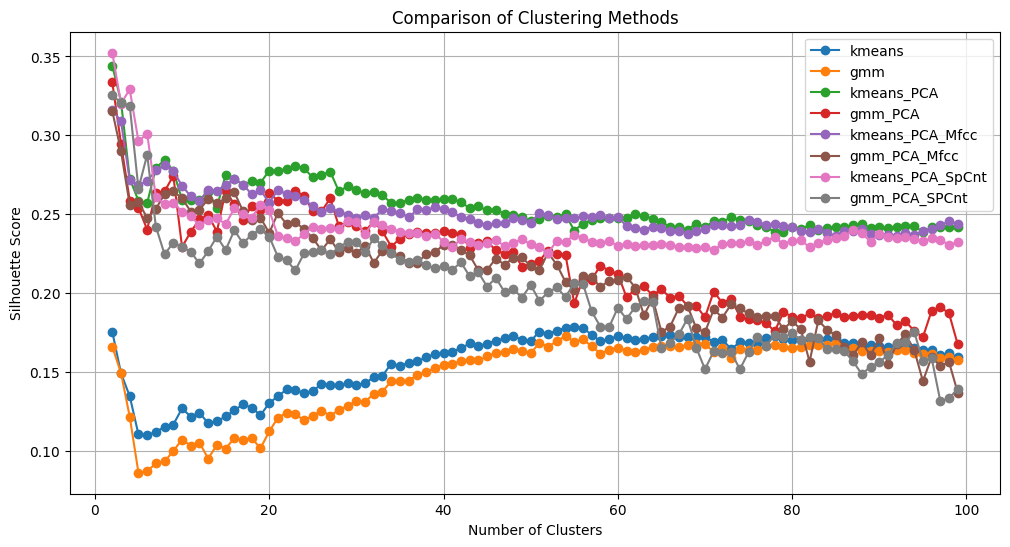

In [27]:
# Plotting the results
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
for method, scores in scores_dict.items():
    plt.plot(n_clusters_range, scores, marker='o', label=method)

plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Clustering Methods')
plt.legend()
plt.grid(True)
plt.show()

# Cluster Analysis

The purpose of this analysis is to evaluate the clustering results by examining the composition of each cluster. Specifically, we aim to understand the distribution of students, gender representation, and the reasoning behind clustering certain samples together.

The **Cluster_Analysis function** performs a detailed analysis of each cluster by:
*   Identifying unique clusters.
*   Counting the number of unique students in each cluster.
*   Analyzing gender distribution within each cluster.
*   Summarizing the number of samples for male and female students in each cluster.

In [28]:
def Cluster_Analysis(df, cluster_label_column):

  cluster_analysis = []
  Num_Cluster = df[cluster_label_column].nunique()

  for cluster in range(Num_Cluster):
      cluster_data = df[df[cluster_label_column] == cluster]
      unique_students = cluster_data['student_id'].nunique()
      male_students = cluster_data[cluster_data['label'] == 'male']['student_id'].nunique()
      female_students = cluster_data[cluster_data['label'] == 'female']['student_id'].nunique()
      cluster_analysis.append({
          'Cluster': cluster,
          'Unique_Students': unique_students,
          'Male_Students': male_students,
          'Female_Students': female_students,
          'male_Samples': cluster_data['label'].value_counts().get('male', 0),
          'Female_Samples': cluster_data['label'].value_counts().get('female', 0)
      })

  cluster_analysis_df = pd.DataFrame(cluster_analysis)
  return cluster_analysis_df

In [29]:
from sklearn.manifold import TSNE

scaler = StandardScaler()
X = scaler.fit_transform(balanced_data[combined_features])

pca = PCA(n_components = 3)
X_pca = pca.fit_transform(X)

tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X)

## Optimal Clustering in both KMeans++ and GMM

### Kmeans++

In [30]:
kmeans = KMeans(n_clusters=optimal_clusters['kmeans_PCA'], init='k-means++', random_state=42)
balanced_data['Cluster_Kmeans_2'] = kmeans.fit_predict(X)

In [31]:
df_Kmeans_2 = Cluster_Analysis(balanced_data, 'Cluster_Kmeans_2')
df_Kmeans_2.head()

,Cluster,Unique_Students,Male_Students,Female_Students,male_Samples,Female_Samples
0,0,35,7,28,105,1853
1,1,43,28,15,1967,219


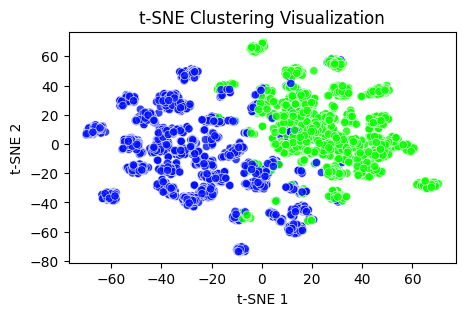

In [32]:
df_tsne = pd.DataFrame(X_tsne, columns=['X_tsne_1', 'X_tsne_2'])

# Add the cluster labels to the DataFrame
df_tsne['Cluster'] = balanced_data['Cluster_Kmeans_2'].copy()

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(5, 3))
sns.scatterplot(
    x='X_tsne_1', y='X_tsne_2',
    hue='Cluster',
    palette=sns.color_palette("hsv", len(df_tsne['Cluster'].unique())),
    data=df_tsne,
    legend=None,
    alpha=0.8
)

# Add titles and labels
plt.title('t-SNE Clustering Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Show the plot
plt.show()

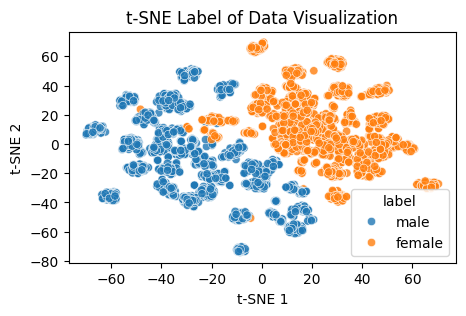

In [33]:

df_tsne['label'] = balanced_data['label'].copy()
# Create a scatter plot
plt.figure(figsize=(5, 3))
sns.scatterplot(
    x='X_tsne_1', y='X_tsne_2',
    hue='label',
    data=df_tsne,
    legend='full',
    alpha=0.8
)

# Add titles and labels
plt.title('t-SNE Label of Data Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Show the plot
plt.show()

### GMM

In [34]:
gmm = GaussianMixture(n_components=optimal_clusters['gmm_PCA'], random_state=42)
balanced_data['Cluster_gmm_2'] = gmm.fit_predict(X)

In [35]:
df_gmm_2 = Cluster_Analysis(balanced_data, 'Cluster_gmm_2')
df_gmm_2.head()

,Cluster,Unique_Students,Male_Students,Female_Students,male_Samples,Female_Samples
0,0,33,5,28,27,2006
1,1,33,28,5,2045,66


## Optimal Clustering in both KMeans++ and GMM, without feature reduction

### Kmeans++

In [36]:
kmeans = KMeans(n_clusters= optimal_clusters['kmeans'], init='k-means++', random_state=42)
balanced_data['Cluster_Kmeans_optimum'] = kmeans.fit_predict(X)

In [37]:
df_Kmeans_opt = Cluster_Analysis(balanced_data, 'Cluster_Kmeans_optimum')
df_Kmeans_opt.head()

,Cluster,Unique_Students,Male_Students,Female_Students,male_Samples,Female_Samples
0,0,6,6,0,83,0
1,1,8,0,8,0,94
2,2,9,9,0,101,0
3,3,4,1,3,60,7
4,4,5,4,1,76,1


In [38]:
print(df_Kmeans_opt.drop(columns = ['Cluster', 'Unique_Students']))

    Male_Students  Female_Students  male_Samples  Female_Samples
0               6                0            83               0
1               0                8             0              94
2               9                0           101               0
3               1                3            60               7
4               4                1            76               1
5               0                6             0              60
6               3                0            77               0
7               7                0           166               0
8               0               11             0              66
9               0                1             0              42
10              5                0           102               0
11              0                6             0              92
12              1                1            72               1
13              7                0           153               0
14              2        

**plot**

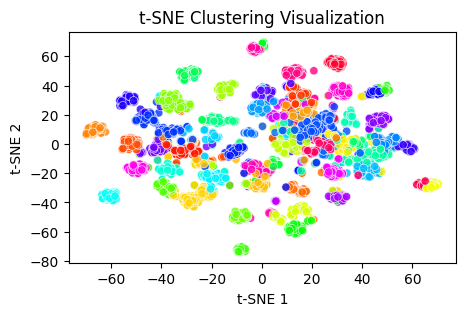

In [39]:
df_tsne = pd.DataFrame(X_tsne, columns=['X_tsne_1', 'X_tsne_2'])

# Add the cluster labels to the DataFrame
df_tsne['Cluster'] = balanced_data['Cluster_Kmeans_optimum'].copy()

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(5, 3))
sns.scatterplot(
    x='X_tsne_1', y='X_tsne_2',
    hue='Cluster',
    palette=sns.color_palette("hsv", len(df_tsne['Cluster'].unique())),
    data=df_tsne,
    legend=None,
    alpha=0.8
)

# Add titles and labels
plt.title('t-SNE Clustering Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Show the plot
plt.show()



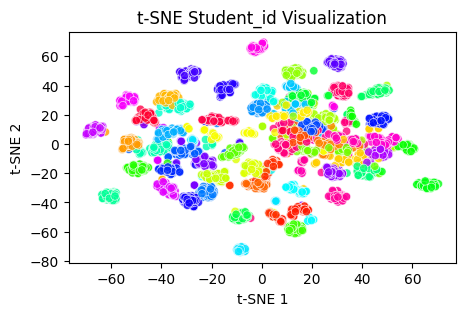

In [40]:
# Add the cluster labels to the DataFrame
df_tsne['student_id'] = balanced_data['student_id'].copy()

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(5, 3))
sns.scatterplot(
    x='X_tsne_1', y='X_tsne_2',
    hue='student_id',
    palette=sns.color_palette("hsv", len(df_tsne['student_id'].unique())),
    data=df_tsne,
    legend=None,
    alpha=0.8
)

# Add titles and labels
plt.title('t-SNE Student_id Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Show the plot
plt.show()

### GMM

In [41]:
gmm = GaussianMixture(n_components=optimal_clusters['gmm'], random_state=42)
balanced_data['Cluster_gmm_opt'] = gmm.fit_predict(X)

In [42]:
df_gmm_opt = Cluster_Analysis(balanced_data, 'Cluster_gmm_opt')
df_gmm_opt.head()

,Cluster,Unique_Students,Male_Students,Female_Students,male_Samples,Female_Samples
0,0,2,2,0,93,0
1,1,4,0,4,0,57
2,2,4,3,1,76,6
3,3,3,3,0,37,0
4,4,5,5,0,134,0


In [43]:
print(df_gmm_opt.drop(columns = ['Cluster', 'Unique_Students']))

    Male_Students  Female_Students  male_Samples  Female_Samples
0               2                0            93               0
1               0                4             0              57
2               3                1            76               6
3               3                0            37               0
4               5                0           134               0
5               2                1           143               1
6               0                3             0              54
7               0                9             0              96
8               5                0           138               0
9               0                2             0              65
10              0                1             0              73
11              2                0            46               0
12              4                2           111               2
13              0                6             0              75
14              0        

## resultes for 30 Clusters

### Kmeans++

In [44]:
kmeans = KMeans(n_clusters= 30, init='k-means++', random_state=42)
balanced_data['Cluster_Kmeans_30'] = kmeans.fit_predict(X)

In [45]:
df_Kmeans_30 = Cluster_Analysis(balanced_data, 'Cluster_Kmeans_30')
df_Kmeans_30.head()

,Cluster,Unique_Students,Male_Students,Female_Students,male_Samples,Female_Samples
0,0,10,9,1,161,2
1,1,8,0,8,0,84
2,2,10,7,3,87,9
3,3,8,6,2,207,18
4,4,14,12,2,147,27


In [46]:
print(df_Kmeans_30.drop(columns = ['Cluster', 'Unique_Students']))

    Male_Students  Female_Students  male_Samples  Female_Samples
0               9                1           161               2
1               0                8             0              84
2               7                3            87               9
3               6                2           207              18
4              12                2           147              27
5               3                2           132               3
6               1               14             3             145
7               1               16             1             190
8              11                0           210               0
9               0               12             0             206
10              0                1             0              73
11              3                1            61               2
12             13                2           194               6
13              0               12             0             150
14              1        

**PLOT**

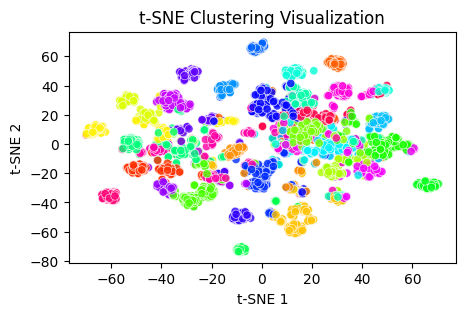

In [47]:
df_tsne = pd.DataFrame(X_tsne, columns=['X_tsne_1', 'X_tsne_2'])

# Add the cluster labels to the DataFrame
df_tsne['Cluster'] = balanced_data['Cluster_Kmeans_30'].copy()

import matplotlib.pyplot as plt
import seaborn as sns

# Create a scatter plot
plt.figure(figsize=(5, 3))
sns.scatterplot(
    x='X_tsne_1', y='X_tsne_2',
    hue='Cluster',
    palette=sns.color_palette("hsv", len(df_tsne['Cluster'].unique())),
    data=df_tsne,
    legend=None,
    alpha=0.8
)

# Add titles and labels
plt.title('t-SNE Clustering Visualization')
plt.xlabel('t-SNE 1')
plt.ylabel('t-SNE 2')

# Show the plot
plt.show()

### GMM

In [48]:
gmm = GaussianMixture(n_components=30, random_state=42)
balanced_data['Cluster_gmm_30'] = gmm.fit_predict(X)

In [49]:
df_gmm_30 = Cluster_Analysis(balanced_data, 'Cluster_gmm_30')
df_gmm_30.head()

,Cluster,Unique_Students,Male_Students,Female_Students,male_Samples,Female_Samples
0,0,3,3,0,146,0
1,1,1,0,1,0,74
2,2,4,2,2,90,9
3,3,6,5,1,213,1
4,4,8,7,1,130,28


In [50]:
print(df_gmm_30.drop(columns = ['Cluster', 'Unique_Students']))

    Male_Students  Female_Students  male_Samples  Female_Samples
0               3                0           146               0
1               0                1             0              74
2               2                2            90               9
3               5                1           213               1
4               7                1           130              28
5               2                0           144               0
6               0                8             0             113
7               0               12             0             234
8               5                0           218               0
9               0                9             0             219
10              0                1             0              73
11              3                1            60               2
12              6                1           188               7
13              0                8             0             183
14              0        